#**사진에 스티커 필터 적용시키기**

- Flow


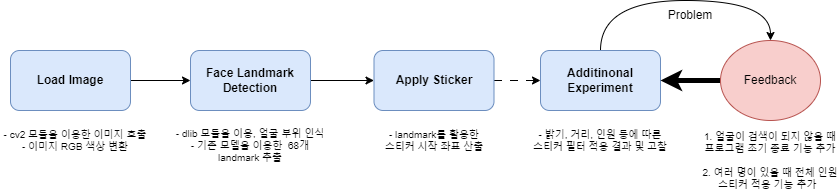




## 0.Preparation

(저작권 관련으로 첨부하지는 않음)

 * cat-whiskers.png : 고양이 수염 스티커
 * face_lied.jpg : 누운 사람 사진
 * 나머지 사진 링크 제공 (from referenceangle.com)

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

## 1.Load Image
셀카말고 그냥 얼굴 사진 다운로드 받아서 실험 진행

아래 사이트에서 각도, 연령, 표정 등을 설정하여 여러 free 이미지 다운로드 받을 수 있음

진짜 저작권 free인지는 모름 주의

[referenceangle](http://referenceangle.com/)

In [2]:
!wget https://s3.amazonaws.com/face-angle-images/4bbb57da-64b6-4b7d-a149-62113cf08749.jpg
!mv 4bbb57da-64b6-4b7d-a149-62113cf08749.jpg face.jpg

--2023-07-12 19:56:59--  https://s3.amazonaws.com/face-angle-images/4bbb57da-64b6-4b7d-a149-62113cf08749.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.201.176, 54.231.224.168, 54.231.138.152, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.201.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52641 (51K) [image/jpeg]
Saving to: ‘4bbb57da-64b6-4b7d-a149-62113cf08749.jpg’

4bbb57da-64b6-4b7d- 100%[===================>]  51.41K  --.-KB/s    in 0.02s   

2023-07-12 19:56:59 (2.55 MB/s) - ‘4bbb57da-64b6-4b7d-a149-62113cf08749.jpg’ saved [52641/52641]



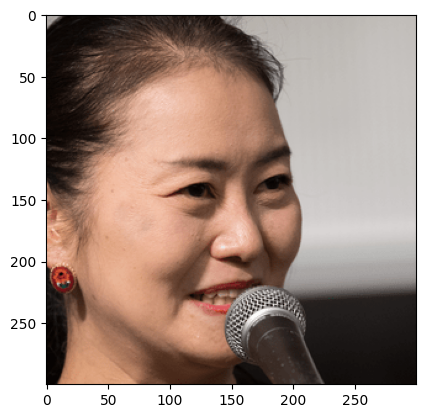

In [14]:
# img_bgr = cv2.imread('face.jpg') # 원본
img = cv2.cvtColor(cv2.imread('face.jpg'),cv2.COLOR_BGR2RGB) # cv2 특, gbr이기 떄문에 rgb 채널 맞춤
img_test = img.copy() # img를 원본으로 두고 여러가지 실험 적용하기 위한 copy

plt.imshow(img)
plt.show()

**-cv2.imread(path, flag) 에서 flag 별 의미**

1. cv2.IMREAD_COLOR (**default**) : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다. -1 로 대체 가능.
2. cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다. 0 으로 대체 가능.
3. cv2.IMREAD_UNCHANGED : 이미지파일을 alpha channel까지 포함하여 읽어 들입니다.  1로 대체 가능.

## 2.Face Landmark Detection


#### (1) Face detection

In [5]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img, 1)

In [6]:
dlib_rects # left, top, right, bottom 순서의 좌표

rectangles[[(56, 77) (242, 263)]]

In [7]:
l,r,b,t = dlib_rects[0].left(),dlib_rects[0].right(),dlib_rects[0].bottom(),dlib_rects[0].top() # 한명이라서 그냥 바로 호출
l,r,b,t

(56, 242, 263, 77)

In [9]:
print('left - right:',l-r,'\ntop - bottom:',t-b)
dlib_rects[0],dlib_rects[0].width(),dlib_rects[0].height()

left - right: -186 
top - bottom: -186


(rectangle(56,77,242,263), 187, 187)


**Q. 계산보다 width, height 가 1 씩 큰 이유는?**
A.얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)

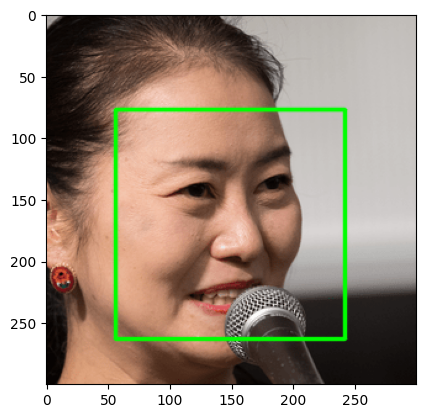

In [15]:
# test에다가 라인을 그려줌
cv2.rectangle(img_test, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
plt.imshow(img_test)
plt.show()

**cv2.line(img, pt1, pt2, color [, thickness [, lineType [, shift]]])**

- img : 그림 그릴 영상

- pt1, pt2 : 직선의 시작점, 직선의 끝점 (영상 벗어난 좌표도 괜찮습니다.)

- color : 선 색상 또는 밝기(B, G, R) 튜플 또는 정수 값

- thickness : 선 두께(기본 값 : 1)

- lineType : 선 타입(기본 값 : cv2.LINE_8)

  1. cv2.LINE_4
  2. cv2.LINE_8
  3. cv2.LINE_AA : 부드러움

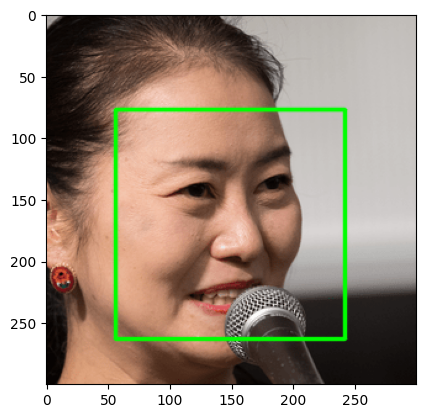

In [11]:
plt.imshow(img_test) # 한번 그리고 나면 line이 저장됨
plt.show()

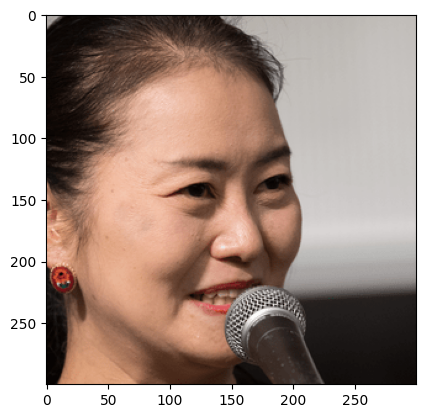

In [17]:
plt.imshow(img) # 원본 보존 확인
plt.show()

In [18]:
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !bzip2 -d ./shape_predictor_68_face_landmarks.dat.bz2
# runtime error로 인해서 해당 파일은 사용하지 않음

!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
# runtime error 때문에 다시 받음

model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴

--2023-07-12 19:58:21--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2023-07-12 19:58:21--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   204MB/s    in 0.5s    

2023-07-12 19:58:23 (204 M

**dlib.shape_predictor(weight)**

- landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
- dlib.rectangle: 내부를 예측하는 박스
- dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
- dlib.full_object_detection 부분을 point로 받아서 x,y 좌표 처리하는 과정을 거침

---

#### (2) Landmark Extraction

In [20]:
list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아 list_landmark 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # 리스트 안에 리스트 형태로 저장됨 ex. [[1번 얼굴 landmark],[2번 얼굴 landmark]]
    list_landmarks.append(list_points)

**Shape_predictor_68_face_landmarks, Face landmark Index**

각 숫자는 해당 위치의 index를 의미한다.

노드에서 사용된 30번 인덱스는 코의 중앙부를 의미함



![Face-Landmark-Representation[1].png width = '5'](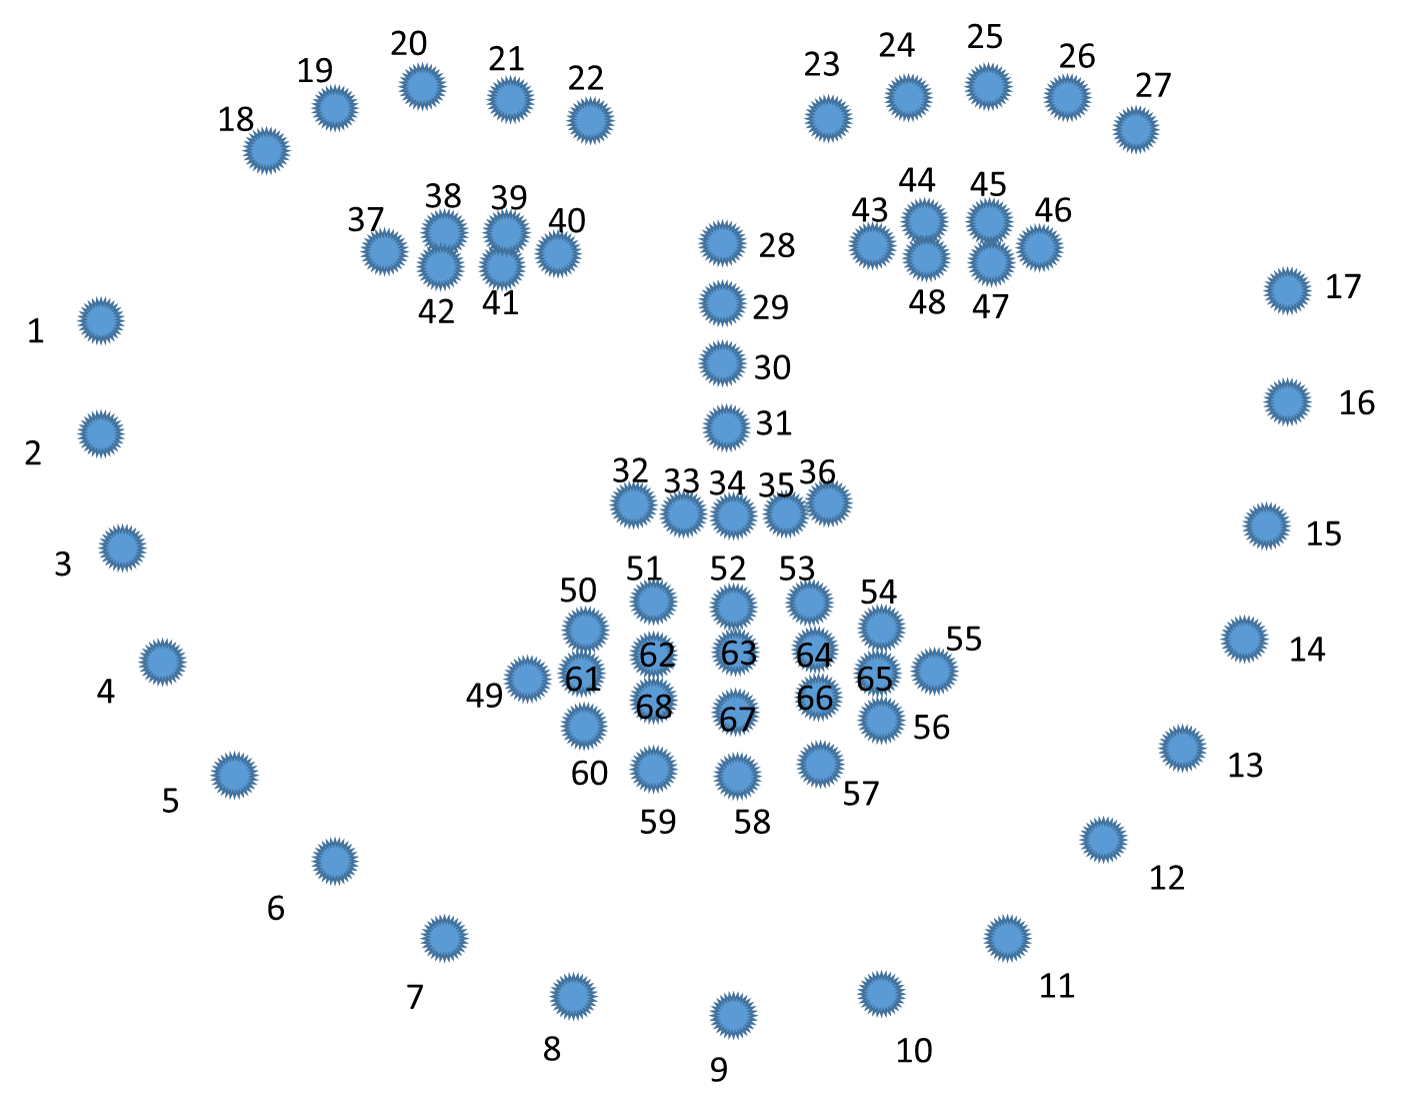)

In [86]:
# 같은 인덱스는 같은 얼굴에 대한 좌표와 landmark들을 의미하기 때문에 zip으로 묶어서 진행
# 스티커를 적용시킬 위치를 계산
index = 32
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
# 이미지에서 코 중앙부를 목표로 설정
    print (landmark[index])
    x = landmark[index][0]
    y = landmark[index][1]
    w = h = dlib_rect.width()

    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(153, 202)
(x,y) : (153,202)
(w,h) : (187,187)


## 3.Apply Sticker


#### (1) 위치에 대한 좌표 설정

original sticker: (128, 128, 3)
resized sticker: (187, 187, 3)


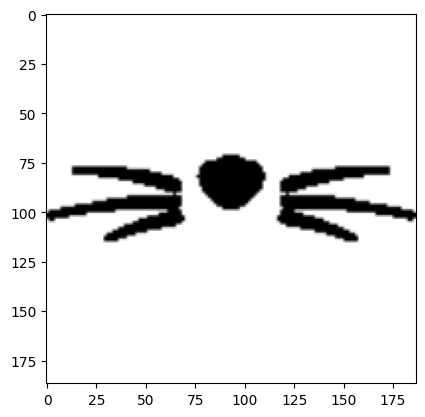

In [87]:
sticker_path = 'cat-whiskers.png'
ori_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(ori_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print ('original sticker:',ori_sticker.shape) # 사이즈를 조정 후
print ('resized sticker:',img_sticker.shape) # 사이즈를 조정 후

img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

plt.imshow(img_sticker)
plt.show()

In [88]:
# x, y 좌표를 조정
# refined_x, refined_y값에서 스티커 이미지가 시작됨

refined_x = x // 2
refined_y = y // 2

print (f'(x,y) : ({refined_x},{refined_y})')

# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 음수값 만큼 스티커 이미지를 자름

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # 예를 들면 refined_y가 -93 이라면, img_sticker[93: , :]가 된다. (187, 187, 3)에서 (94, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')
print ('croped size',img_sticker.shape)

(x,y) : (76,101)
(x,y) : (76,101)
croped size (187, 187, 3)


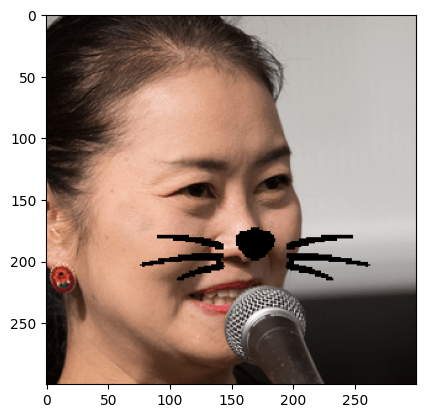

In [89]:
# 좌표 순서가 y,x임에 유의 (y,x,rgb channel)
# 적용할 사진의 sticker 위치 부분을 별도로 저장해서 적용

img_test = img.copy() # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴

sticker_area = img_test[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_test[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(img_test)
plt.show()

**numpy.where(condition, [x, y, ]/)**

```
if condition:
  return x
else:
  return y
```

np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,나머지 부분은 스티커로 채워주면 됨.

##### 고찰 1.
 콧망울 중앙부 (index 31) 를 기준으로 좌표를 설정, 각도가 충분히 적용된 사진이므로 위치의 조정이 필요

 -> 오른쪽 콧망울 시작 (index 32~34) 을 기준으로 하면 좀 더 자연스러울 것

 -> 32~34 중 32가 가장 자연스러웠음

___

#### (2) 불투명한 스티커 적용


In [103]:
img_test = img.copy() # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴
img_sticker = cv2.resize(ori_sticker, (w,h)) # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴
sticker_area = img_test[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

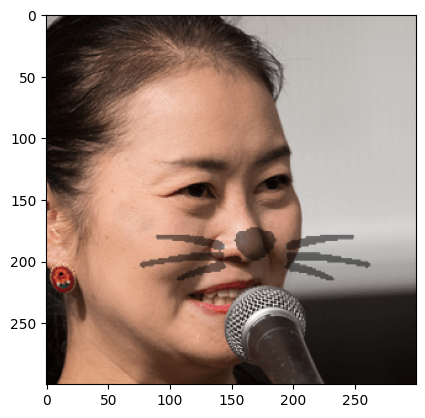

In [104]:
img_test[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(img_test)
plt.show()


**cv2.addWeight(img1, alpha, img2, beta, gamma)**

‘블렌딩 Blending ’

2개의 입력 이미지의 투명도를 조정하여 2개의 이미지가 겹쳐보이도록 만드는 것

OpenCV는 블렌딩을 위해 addWeighted함수를 제공
[ref1](https://yerimoh.github.io/C8/),
[ref2](https://bkshin.tistory.com/entry/OpenCV-9-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%97%B0%EC%82%B0/).

- img1, img2: 합성할 두 이미지
- alpha: img1에 지정할 가중치(알파 값)
- beta: img2에 지정할 가중치, 흔히 (1-alpha) 적용
- gamma: 연산 결과에 가감할 상수, 흔히 0 적용

dst = img1*alpha + img2 * beta + gamma 로 계산됨

상수가 가질 수 있는 범위 0.0~1.0
0.0에 가까울 수록 투명한 상태, 1.0에 가까워질수록 불투명



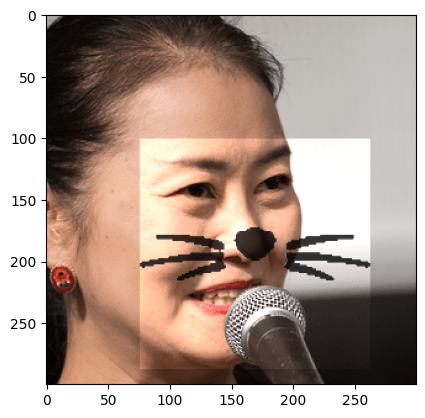

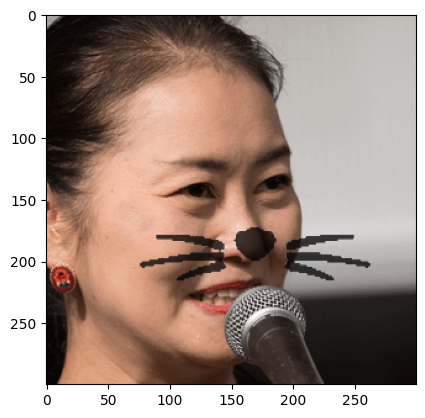

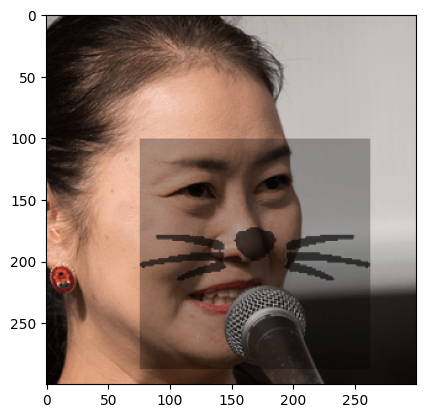

In [106]:
# beta가 클 때

img_test = img.copy() # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴
img_sticker = cv2.resize(ori_sticker, (w,h)) # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴

img_test[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8), 0.8, 0)
plt.imshow(img_test)
plt.show()

# 중간

img_test = img.copy() # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴
img_sticker = cv2.resize(ori_sticker, (w,h)) # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴

img_test[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(img_test)
plt.show()

# beta가 작을 때
img_test = img.copy() # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴
img_sticker = cv2.resize(ori_sticker, (w,h)) # 여러번 테스트 하기 위해서 계속 원본의 copy를 받아옴

img_test[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8), 0.2, 0)
plt.imshow(img_test)
plt.show()

##### 고찰 2.
 beta 값이 0.5일때만 사진이 자연스러움
 -> 불투명한 정도를 조절하기 위한 방법..?

## 4.Additional Experiments
다양한 상황에 대한 sticker 적용 실험

(1) 회전된 얼굴/ 누운 얼굴

(2) 먼 언굴

(3) 밝거나 어두운 얼굴

(4) 여러 얼굴



In [219]:
# 여러 사진에 재사용하기 위하여 함수화

def face_detection(img):
  dlib_rects = detector_hog(img, 1)
  return dlib_rects

def face_landmark(img, dlib_rects, show = False):
  list_landmarks = []

  if len(dlib_rects) < 1 : # dlib가 사람 못찾으면 종료시킴
    print("Warning! Didn't Detect Face in the Photo")
    return None

  if show: # 원본 훼손 방지를 위해 copy 이미지에 점 찍음
   imgcopy = img.copy()

  for dlib_rect in dlib_rects:
      points = landmark_predictor(img, dlib_rect)
      list_points = list(map(lambda p: (p.x, p.y), points.parts()))

      list_landmarks.append(list_points)

      if show: # 원한다면 얼굴을 찍음
          for n in range(0, 68):
            a = points.part(n).x
            b = points.part(n).y
            cv2.circle(imgcopy, (a, b), 4, (255, 0, 0), -1)

  if show: # 원한다면 얼굴을 찍음
    plt.imshow(imgcopy)
    plt.show()
  return list_landmarks

def sticker_position(dlib_rects, list_landmarks, index):
  for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 같은 인덱스는 같은 얼굴에 대한 좌표와 landmark들을 의미하기 때문에 zip으로 묶어서 진행
    print ('index 좌표:',landmark[index])
    a = landmark[index][0]
    b = landmark[index][1]
    c = d = dlib_rect.width()
    print (f'(x,y) : ({a},{b})')
    print (f'(w,h) : ({c},{d})')

  return a, b, c, d

def apply_sticker(faces, sticker, dlib_rects, list_landmarks, index, weighted = False, save = False):

  if len(dlib_rects) < 1 : # dlib가 사람 못찾으면 종료시킴
    print("Warning! Didn't Detect Face in the Photo")
    return None

  x, y, w, h =  sticker_position(dlib_rects, list_landmarks, index)

  img_sticker = cv2.resize(sticker, (w,h))

  refined_x = x - w // 2
  refined_y = y - h // 2

  if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

  if refined_y < 0:
      img_sticker = img_sticker[-refined_y:, :]
      refined_y = 0

  print (f'(x,y) : ({refined_x},{refined_y})')

  sticker_area = faces[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

  if weighted : # 불투명한 스티커를 원할 떄
    faces[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
  else:
    faces[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8)

  plt.imshow(faces)
  plt.show()

  if save : # 따로 array로 저장하려고 하면, 지금은 그냥 보고 지나갈거라서 Default == False
    return faces

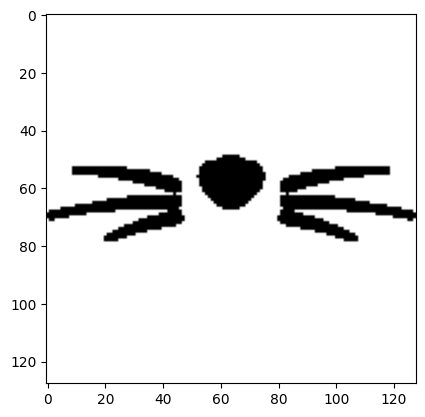

In [125]:
plt.imshow(ori_sticker) # sticker 원본 재확인

#### (1) 회전된 얼굴/ 누운 얼굴

In [112]:
#(1-1) 회전된 얼굴
!wget https://s3.amazonaws.com/face-angle-images/0bf943b7-e244-4b28-a7b3-c3a2fba079bb.jpg
!mv 0bf943b7-e244-4b28-a7b3-c3a2fba079bb.jpg face_sided.jpg

--2023-07-12 21:12:57--  https://s3.amazonaws.com/face-angle-images/0bf943b7-e244-4b28-a7b3-c3a2fba079bb.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.65.48, 52.216.112.189, 3.5.8.165, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.65.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52093 (51K) [image/jpeg]
Saving to: ‘0bf943b7-e244-4b28-a7b3-c3a2fba079bb.jpg’

0bf943b7-e244-4b28- 100%[===================>]  50.87K  --.-KB/s    in 0.02s   

2023-07-12 21:12:57 (2.54 MB/s) - ‘0bf943b7-e244-4b28-a7b3-c3a2fba079bb.jpg’ saved [52093/52093]



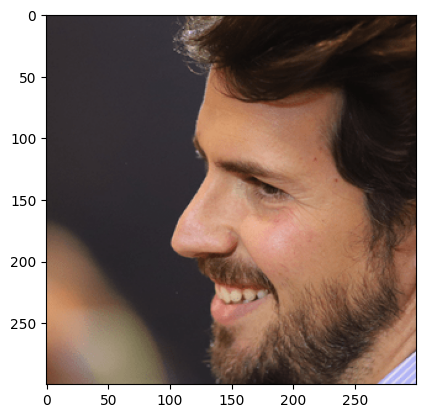

In [117]:
img_ori = cv2.cvtColor(cv2.imread('face_sided.jpg'),cv2.COLOR_BGR2RGB)
img = img_ori.copy()
plt.imshow(img)
plt.show()

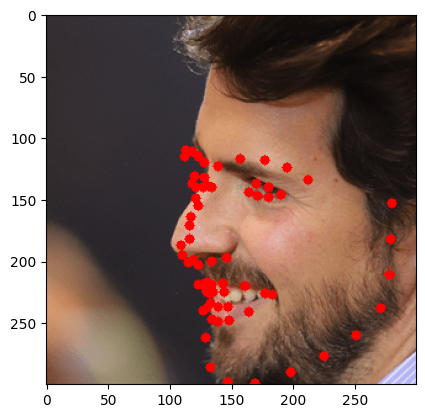

In [121]:
detector = face_detection(img)
landmarks = face_landmark(img, detector, True)

index 좌표: (110, 195)
(x,y) : (110,195)
(w,h) : (187,187)
(x,y) : (17,102)


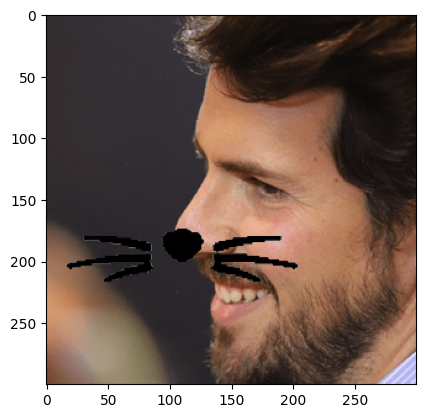

In [129]:
index = 31
# 대체로 31-32에서 코부분을 인식하기 때문에 다른 상황에서도 굳이 변경하지는 않을 예정
apply_sticker(img, ori_sticker, detector, landmarks, index, weighted = True)

##### 고찰 3.
 스티커가 접히는 것이 아니므로 스티커와 사진간의 괴리가 생김

 스티커가 회전해야하는데 회전 조건을 어떻게 잡아야하는지 의문이 듦.

 -> 핸드폰 사진편집 중 에서 수평회전, 수직회전 적용하는 부분을 써서 적용시키면?

 -> 회전된 얼굴이라고 판단은 일부 landmark 간의 간격? 왼쪽눈 오른쪽눈 거리가 몇 이하면 어느 정도 회전 등 기준?


#### (2) 먼 얼굴

In [133]:
# https://www.pexels.com/photo/man-lying-on-couch-while-reading-a-book-4342121/
# free 긴한데 web에서 바로가져오는건 forbidden이라 다운받음
# !mv pexels-nicolai-mitchell-4342121.jpg face_lied.jpg

mv: cannot stat 'pexels-nicolai-mitchell-4342121.jpg': No such file or directory


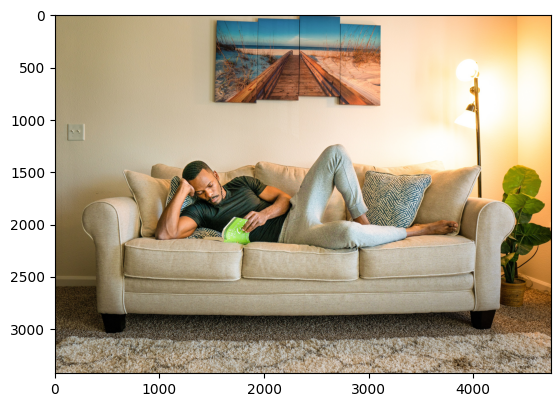

In [171]:
img_ori = cv2.cvtColor(cv2.imread('face_lied.jpg'),cv2.COLOR_BGR2RGB)
img = img_ori.copy()
plt.imshow(img)
plt.show()

In [177]:
%%timeit
detector = face_detection(img)

14.4 s ± 1.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [178]:
landmarks = face_landmark(img, detector,True)
apply_sticker(img, ori_sticker, detector, landmarks, index, weighted = True)

Warning! Didn't Detect Face in the Photo
Warning! Didn't Detect Face in the Photo


##### 고찰 4.
 멀리있는 것은 얼굴인식하기 어려운 것으로 보임.
 face_detection 자체가 완료가 오래걸렸음 -> 셀에 시간이 출력되어도 좋을 듯.

 대체적으로 얼굴이 주변 사물과 비슷한 크기가 되면 인식이 어려워지는가 싶기도 하고..찾는 과정에서도 get_frontal_face_detector()가 일을 못해서 cnn 기반의 검출기인 dlib.cnn_face_detection_model_v1을 추천하는 사례가 있었음.




#### (3) 밝거나 어두운 얼굴

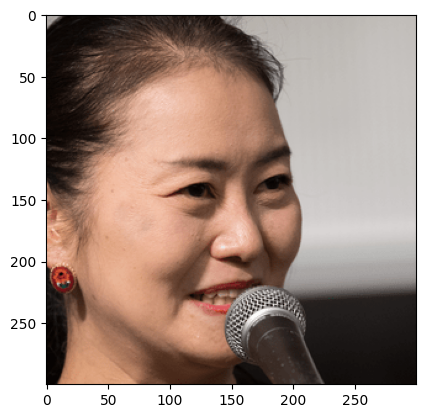

In [179]:
img_ori = cv2.cvtColor(cv2.imread('face.jpg'),cv2.COLOR_BGR2RGB)
img = img_ori.copy()
plt.imshow(img)
plt.show()

In [180]:
%%timeit
detector = face_detection(img)

92.7 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


사람 검출 힘들 때 :14.4 s ± 1.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

쉬울 때: 92.7 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

시간이 대략 150배 정도 차이남


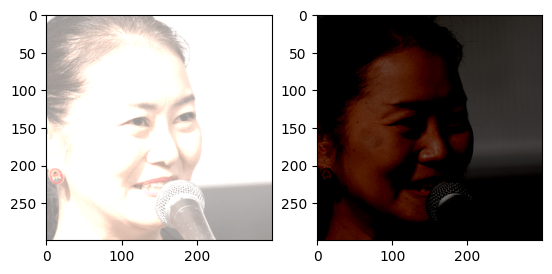

In [181]:
val = 150
array = np.full(img.shape, (val, val, val), dtype = np.uint8)

brt = cv2.add(img, array) # 색상값을 더해서 밝게
dak = cv2.subtract(img, array) # 색상값을 빼서 어둡게

ax1 = plt.subplot(121)
ax1.imshow(brt)
ax2 = plt.subplot(122)
ax2.imshow(dak)
plt.show()

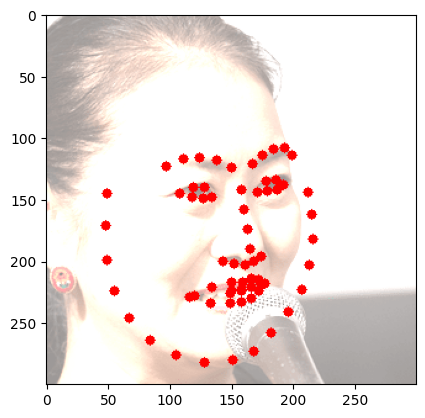

index 좌표: (161, 203)
(x,y) : (161,203)
(w,h) : (187,187)
(x,y) : (68,110)


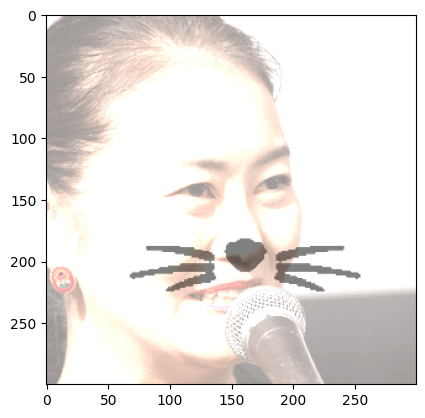

In [182]:
index = 33
detector = face_detection(brt)
landmarks = face_landmark(brt, detector,True)
apply_sticker(brt, ori_sticker, detector, landmarks, index, weighted = True)

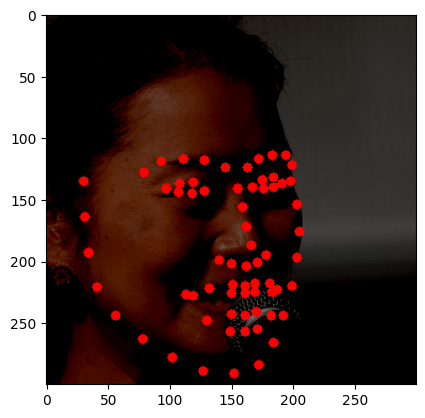

index 좌표: (162, 204)
(x,y) : (162,204)
(w,h) : (187,187)
(x,y) : (69,111)


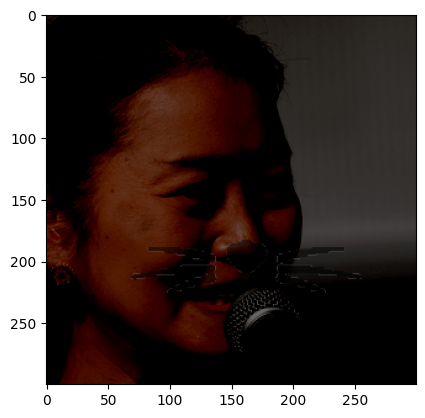

In [183]:
detector = face_detection(dak)
landmarks = face_landmark(dak, detector,True)
apply_sticker(dak, ori_sticker, detector, landmarks, index, weighted = True)

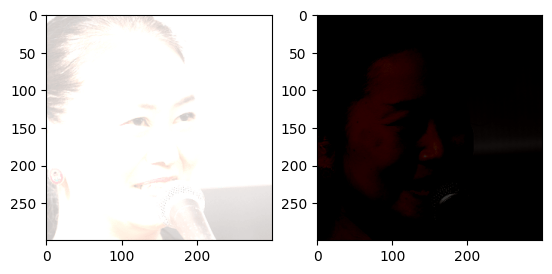

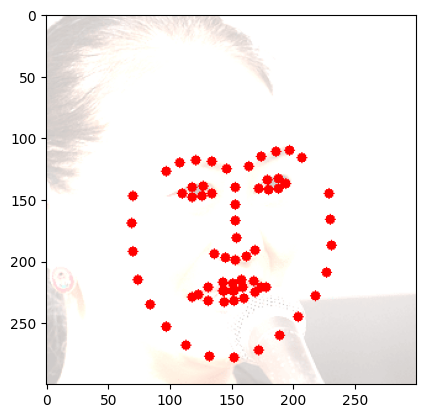

index 좌표: (153, 199)
(x,y) : (153,199)
(w,h) : (187,187)
(x,y) : (60,106)


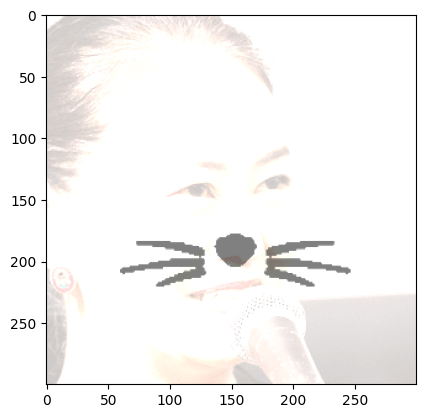

Warning! Didn't Detect Face in the Photo
Warning! Didn't Detect Face in the Photo


In [184]:
val = 200
array = np.full(img.shape, (val, val, val), dtype = np.uint8)

brt = cv2.add(img, array) # 색상값을 더해서 밝게
dak = cv2.subtract(img, array) # 색상값을 빼서 어둡게

ax1 = plt.subplot(121)
ax1.imshow(brt)
ax2 = plt.subplot(122)
ax2.imshow(dak)
plt.show()

detector = face_detection(brt)
landmarks = face_landmark(brt, detector,True)
apply_sticker(brt, ori_sticker, detector, landmarks, index, weighted = True)

detector = face_detection(dak)
landmarks = face_landmark(dak, detector,True)
apply_sticker(dak, ori_sticker, detector, landmarks, index, weighted = True)

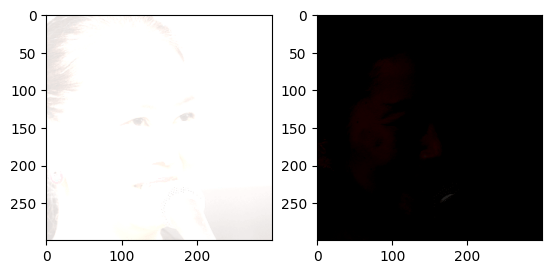

Warning! Didn't Detect Face in the Photo
Warning! Didn't Detect Face in the Photo
Warning! Didn't Detect Face in the Photo
Warning! Didn't Detect Face in the Photo


In [185]:
val = 220
array = np.full(img.shape, (val, val, val), dtype = np.uint8)

brt = cv2.add(img, array) # 색상값을 더해서 밝게
dak = cv2.subtract(img, array) # 색상값을 빼서 어둡게

ax1 = plt.subplot(121)
ax1.imshow(brt)
ax2 = plt.subplot(122)
ax2.imshow(dak)
plt.show()

detector = face_detection(brt)
landmarks = face_landmark(brt, detector,True)
apply_sticker(brt, ori_sticker, detector, landmarks, index, weighted = True)

detector = face_detection(dak)
landmarks = face_landmark(dak, detector,True)
apply_sticker(dak, ori_sticker, detector, landmarks, index, weighted = True)

##### 고찰 5.
밝은 것은 대체적으로 밝아져도 인식을 잘 하는 편이다.

아무래도 눈코입에 음영이 들어가서 대비되기 때문인 것 같은데, 같은 이유로 어두워지면 인식이 어려워진다.


#### (4) 여러 얼굴

In [163]:
# #https://www.freepik.com/free-photo/happy-excited-friends-reunited_20032254.htm#query=group%20selfie&position=19&from_view=keyword&track=ais
# !wget https://img.freepik.com/free-photo/happy-excited-friends-reunited_23-2149165142.jpg?w=826&t=st=1689200192~exp=1689200792~hmac=4a7c59f1be42ad3c13eb5c85ab43b21e994f486a152aec6a74dc0d8a6b415b28
# !mv happy-excited-friends-reunited_23-2149165142.jpg?w=826 grouped_face.jpg

--2023-07-12 22:17:09--  https://img.freepik.com/free-photo/happy-excited-friends-reunited_23-2149165142.jpg?w=826
Resolving img.freepik.com (img.freepik.com)... 23.77.172.248, 2600:141b:e800:1380::312e, 2600:141b:e800:1393::312e
Connecting to img.freepik.com (img.freepik.com)|23.77.172.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92336 (90K) [image/jpeg]
Saving to: ‘happy-excited-friends-reunited_23-2149165142.jpg?w=826.1’

happy-excited-frien 100%[===================>]  90.17K  --.-KB/s    in 0.06s   

2023-07-12 22:17:10 (1.53 MB/s) - ‘happy-excited-friends-reunited_23-2149165142.jpg?w=826.1’ saved [92336/92336]



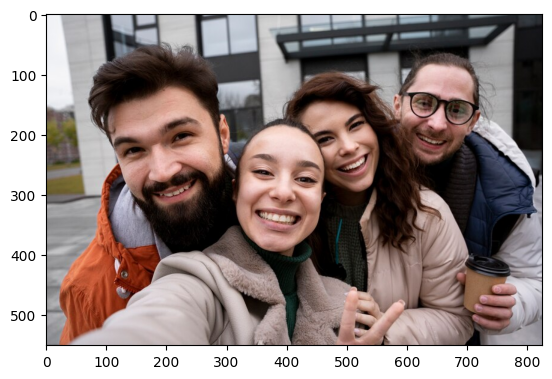

In [220]:
img_ori = cv2.cvtColor(cv2.imread('grouped_face.jpg'),cv2.COLOR_BGR2RGB)
img = img_ori.copy()
plt.imshow(img)
plt.show()

In [221]:
detector = face_detection(img)
len(detector)

4

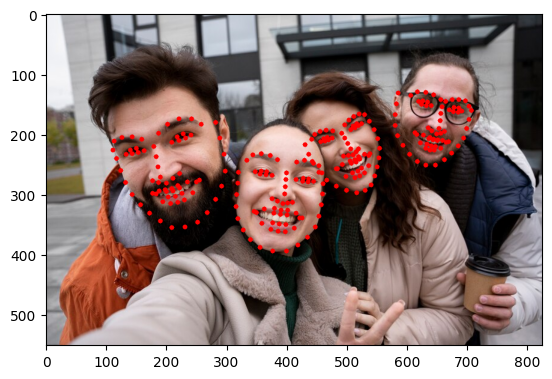

In [222]:
landmarks = face_landmark(img, detector,True)

index 좌표: (511, 234)
(x,y) : (511,234)
(w,h) : (130,130)
index 좌표: (394, 315)
(x,y) : (394,315)
(w,h) : (155,155)
index 좌표: (200, 281)
(x,y) : (200,281)
(w,h) : (187,187)
index 좌표: (650, 199)
(x,y) : (650,199)
(w,h) : (130,130)
(x,y) : (585,134)


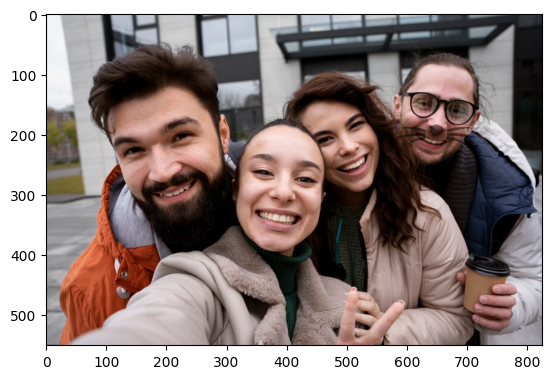

In [223]:
apply_sticker(img, ori_sticker, detector, landmarks, index, weighted = True)

##### 고찰 6.
여러 얼굴은 애초에 position을 받을 떄 1개의 좌표만 있는 경우를 상정하여 코드를 작성하였기 떄문에 스티커가 하나밖에 안붙음

detector 수가 1 이상일 때는 list로 return 하는 경우로 코드를 수정함


In [248]:
def sticker_position(dlib_rects, list_landmarks, index):

  if len(dlib_rects) < 1 : # dlib가 사람 못찾으면 종료시킴
    print("Warning! Didn't Detect Face in the Photo")
    return None

  x = []
  y = []
  w = []
  h = []

  for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 같은 인덱스는 같은 얼굴에 대한 좌표와 landmark들을 의미하기 때문에 zip으로 묶어서 진행
    print ('index 좌표:',landmark[index])
    a = landmark[index][0]
    b = landmark[index][1]
    c = d = dlib_rect.width()
    print (f'(x,y) : ({a},{b})')
    print (f'(w,h) : ({c},{d})')

    x.append(a)
    y.append(b)
    w.append(c)
    h.append(d)
  return x, y ,w, h

def apply_sticker(faces, sticker, dlib_rects, list_landmarks, index, weighted = False, save = False):

  x, y, w, h =  sticker_position(dlib_rects, list_landmarks, index)

  for a,b,c,d in zip(x,y,w,h):

    img_sticker = cv2.resize(sticker, (c,d))
    print(faces.shape, img_sticker.shape)
    refined_x = a - c // 2
    refined_y = b - d // 2

    if refined_x < 0:
      img_sticker = img_sticker[:, -refined_x:]
      refined_x = 0

    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0

    print (f'(refined x,refined y) : ({refined_x},{refined_y})')

    sticker_area = faces[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    if weighted : # 불투명한 스티커를 원할 떄
      faces[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
          cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
    else:
      faces[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
          np.where(img_sticker>100,sticker_area,img_sticker).astype(np.uint8)

  plt.imshow(faces)
  plt.show()

  if save : # 따로 array로 저장하려고 하면, 지금은 그냥 보고 지나갈거라서 Default == False
    return faces

index 좌표: (511, 234)
(x,y) : (511,234)
(w,h) : (130,130)
index 좌표: (394, 315)
(x,y) : (394,315)
(w,h) : (155,155)
index 좌표: (200, 281)
(x,y) : (200,281)
(w,h) : (187,187)
index 좌표: (650, 199)
(x,y) : (650,199)
(w,h) : (130,130)
(551, 826, 3) (130, 130, 3)
(refined x,refined y) : (446,169)
(551, 826, 3) (155, 155, 3)
(refined x,refined y) : (317,238)
(551, 826, 3) (187, 187, 3)
(refined x,refined y) : (107,188)
(551, 826, 3) (130, 130, 3)
(refined x,refined y) : (585,134)


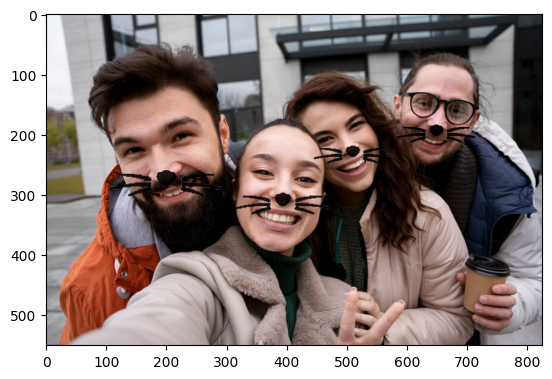

In [249]:
apply_sticker(img, ori_sticker, detector, landmarks, index, weighted = True)

##### 고찰 7.
생각보다는 잘 되는 것 같은데 여러 명이서 다양한 각도로 있는 경우에는 case (1)에서 봉착했던 문제가 발생할 듯

스티커를 반투명 설정했는데 이게 계속 덧그려지면서 수염이 진해지는 문제가....
-> 한번에 position 바꾸는 방향으로 코드 수정이 필요함

또 sticker끼리 pixel position이 겹칠 때도 봐야할 것 같음
